<h2><center>Applied Machine Learning - Assignment 2</center></h2>
<h4><center>Lorenzo Cirac Monteagduo</center></h4>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<h3>Question 1: Pandas</h3>

<h4>Dataset Exploration</h4>
<p>Download Gasprices.csv. This dataset contains information about the
sales of gas stations across a city along with other attributes. You will analyze this dataset using
pandas library and plot some interesting information using the matplotlib library.</p>
<ul>
    <li>Load the data using pandas</li>
    <li>Summarize each NUMERIC field</li>
    <li>Group data by the field Name: <ul>
            <li>Find the average price, average income, and average number of pumps for each group.</li>
            <li>Use a boxplot that visualizes the statistical information about (price, pumps, gasoline).</li>
            <li>Use the Price and Income features to plot a prediction line similar to the first exercise.
Normalize the Income (implement this yourself) and plot the line again. Comment on
the difference between the two plots.</li>
        </ul>
    </li>
</ul>

<h4>Solution</h4>
<p>Let's begin with loading in gasprices.csv in a pandas dataframe. To summarize each numeric field in the data, such as the mean, standard deviation, and other statistics, we can use the pandas.describe() function. This will provide information about the mean, standard deviation, and other key statistics for each numeric field.</p>

In [2]:
gasprices = pd.read_csv('res/gasprices.csv')

gasprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             101 non-null    int64  
 1   ID                     101 non-null    int64  
 2   Name                   101 non-null    object 
 3   Price                  101 non-null    float64
 4   Pumps                  101 non-null    int64  
 5   Interior               101 non-null    object 
 6   Restaurant             101 non-null    object 
 7   CarWash                101 non-null    object 
 8   Highway                101 non-null    object 
 9   Intersection           101 non-null    object 
 10  Stoplight              101 non-null    object 
 11  IntersectionStoplight  94 non-null     object 
 12  Gasolines              101 non-null    int64  
 13  Competitors            101 non-null    object 
 14  Zipcode                101 non-null    int64  
 15  Addres

In [3]:
gasprices[['Price', 'Pumps', 'Gasolines', 'Income']].describe()

,Price,Pumps,Gasolines,Income
count,101.000000,101.000000,101.000000,101.000000
mean,1.864257,6.950495,3.465347,56727.217822
std,0.081515,3.925242,0.557931,25868.359804
min,1.730000,2.000000,1.000000,12786.000000
25%,1.790000,4.000000,3.000000,37690.000000
50%,1.850000,6.000000,3.000000,52306.000000
75%,1.920000,8.000000,4.000000,70095.000000
max,2.090000,24.000000,4.000000,128556.000000


<p>For this task, we will combine the groupby() function with the agg() function. First, we will group our data by
the "Name" column. Then, we will use the agg() function to create the columns Avg_Price, Avg_Income, and
Avg_Pumps, where we will apply the mean function to each numeric field. In the end, we use the reset_index()
function to convert the grouped result back into a DataFrame with a default integer index.</p>

In [4]:
grouped_df = gasprices.groupby('Name').agg(
     Avg_Price = ('Price', 'mean'),
     Avg_Income = ('Income', 'mean'),
     Avg_Pumps = ('Pumps', 'mean')
).reset_index()

grouped_df

,Name,Avg_Price,Avg_Income,Avg_Pumps
0,7-Eleven,1.887778,53432.333333,4.666667
1,Around the Corner Store,1.940000,63750.000000,2.000000
2,Chevron,1.871818,61754.636364,8.727273
3,Citgo,1.835000,49387.000000,4.000000
4,Conoco,1.890000,43545.500000,4.000000
5,Costco,1.730000,70095.000000,12.000000
6,Double R Grocery,1.790000,37690.000000,4.000000
7,East 1st Grocery,1.770000,37690.000000,4.000000
8,Exxon,1.855000,52344.333333,11.500000
9,Gulf,1.788571,50084.142857,5.714286


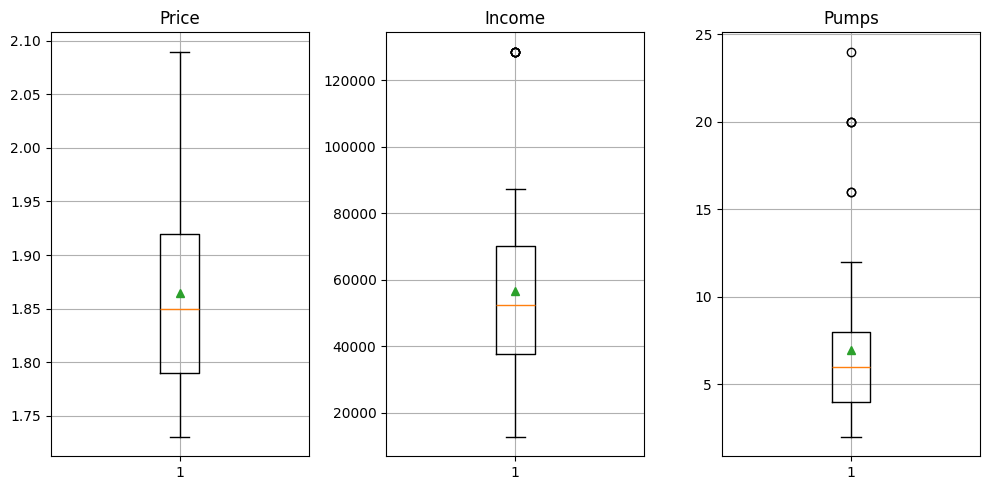

In [5]:
fig = plt.figure(figsize = (10,5))
axs = fig.subplots(1, 3)

data_columns = ['Price', 'Income', 'Pumps']
for i, data in enumerate(data_columns):
     axs[i].set_title(data)
     axs[i].boxplot(gasprices[data], showmeans = True)
     axs[i].grid()
    
plt.tight_layout()
plt.show()

<p>To plot our prediction line between income and price, we can utilize our leanSimpleRegression() and
predictSimpleRegression() functions from the previous exercise.</p>

In [6]:
def learn_simple_linear_reg(x, y):
    x_mean = x.mean()
    y_mean = y.mean()

    beta_1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    beta_0 = y_mean - beta_1 * x_mean

    return beta_0, beta_1

def predict_simple_linear_reg(x, beta_0, beta_1):
    y_hat = beta_0 + beta_1 * x
    return y_hat

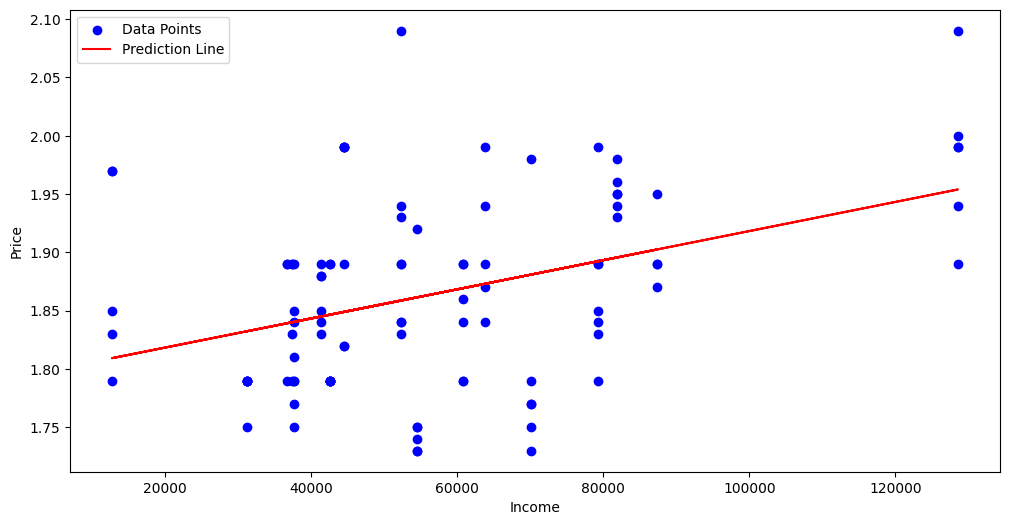

In [7]:
beta_0, beta_1 = learn_simple_linear_reg(gasprices['Income'], gasprices['Price'])
y_prediction = predict_simple_linear_reg(gasprices['Income'], beta_0, beta_1)

plt.figure(figsize = (12,6))
plt.scatter(gasprices['Income'], gasprices['Price'], color = 'blue', label = 'Data Points')
plt.plot(gasprices['Income'], y_prediction, color = 'red', label = 'Prediction Line')
plt.xlabel('Income')
plt.ylabel('Price')
plt.legend()
plt.show()

<p>Now we will normalize our data:</p>
$$X' = \frac{X - min(X)}{max(X) - min(X)}$$

In [8]:
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

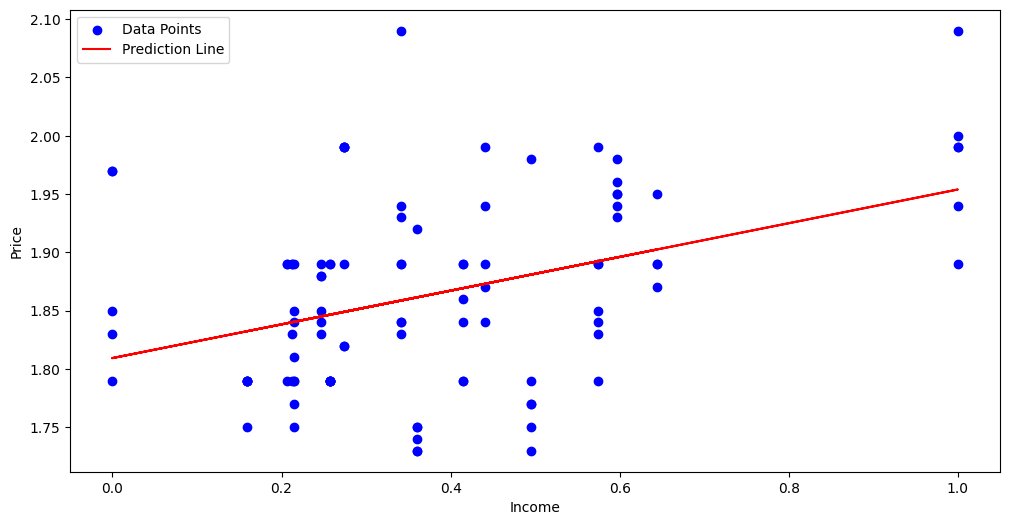

In [9]:
beta_0, beta_1 = learn_simple_linear_reg(normalize(gasprices['Income']), gasprices['Price'])
y_prediction = predict_simple_linear_reg(normalize(gasprices['Income']), beta_0, beta_1)

plt.figure(figsize = (12,6))
plt.scatter(normalize(gasprices['Income']), gasprices['Price'], color = 'blue', label = 'Data Points')
plt.plot(normalize(gasprices['Income']), y_prediction, color = 'red', label = 'Prediction Line')
plt.xlabel('Income')
plt.ylabel('Price')
plt.legend()
plt.show()